In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Numerical Variable

In [4]:
# All features are numerical. Lets check how many discrete and continuous features we have
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [9]:
discrete_feature

['CHAS', 'RAD']

In [10]:
print(df['CHAS'].unique())
print(df['RAD'].unique())

[0. 1.]
[ 1.  2.  3.  5.  4.  8.  6.  7. 24.]


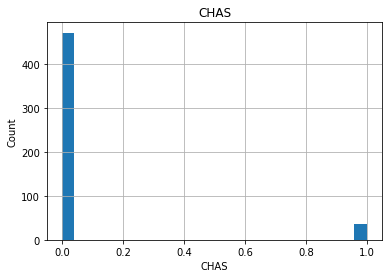

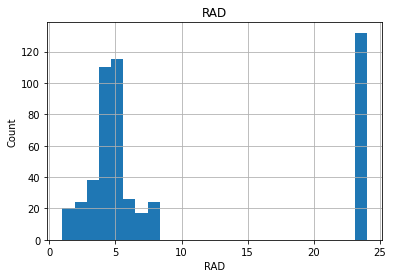

In [11]:
# HISTOGRAM of discrete features

for feature in discrete_feature:
    data=df.copy()  # create a copy to not affect the real dataframe
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

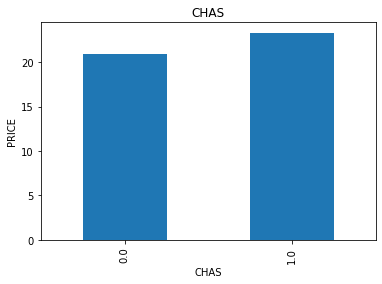

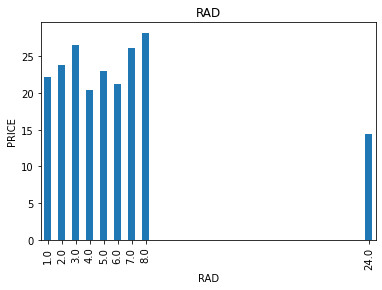

In [12]:
# Lets Find the realtionship between discrete features and Price using different plots
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.show()

In [13]:
df['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

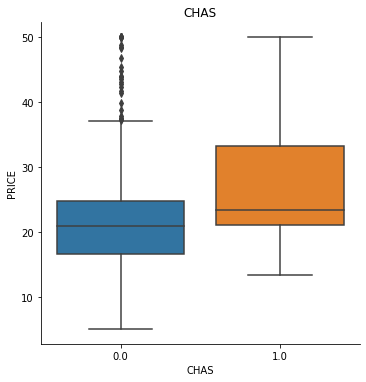

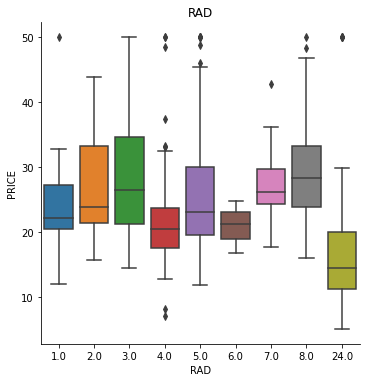

In [14]:
# Boxplot
import seaborn as sns
for feature in discrete_feature:
    data=df.copy()
    sns.catplot(x=feature, y="PRICE", data=df, kind="box")
    plt.title(feature)
    plt.show()

It looks like CHAS and RAD do not give useful information about the target variable

# Continious Variable

In [16]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_feature and 'PRICE']
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 12
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


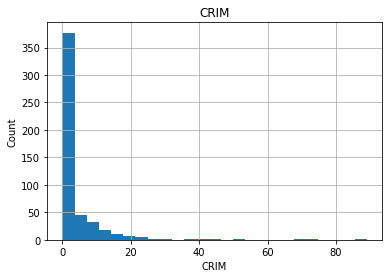

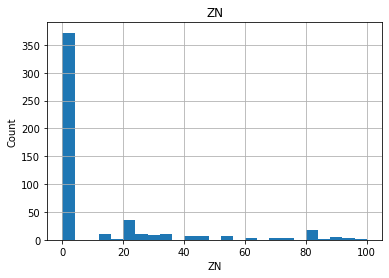

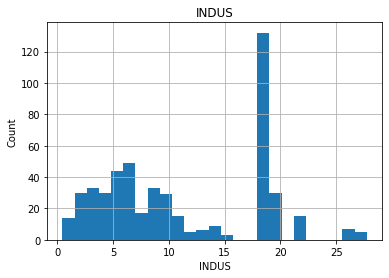

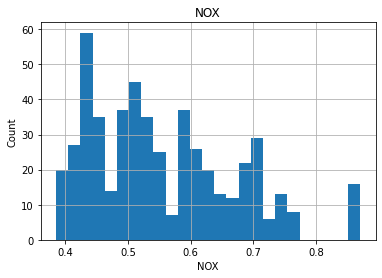

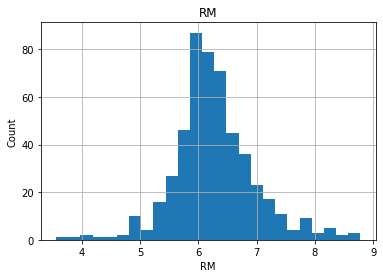

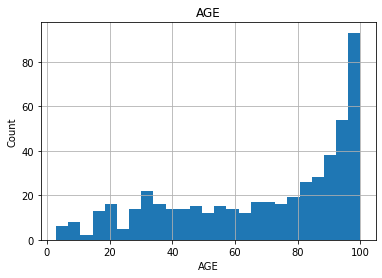

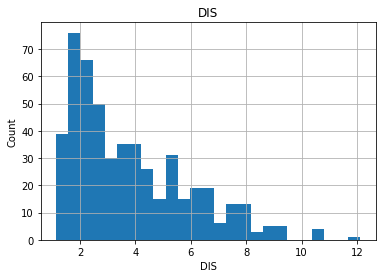

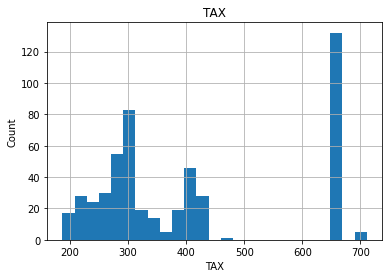

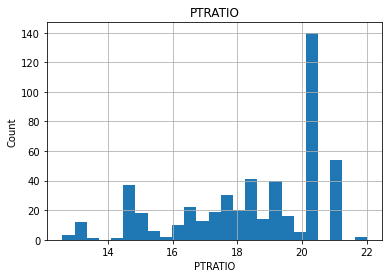

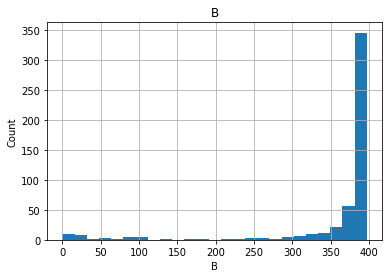

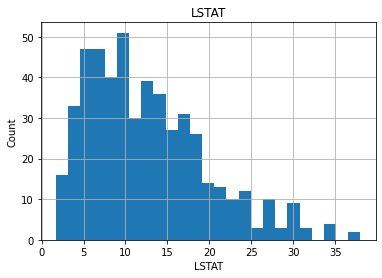

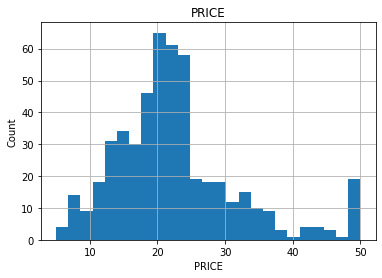

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()  # create a copy to not affect the real dataframe
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

CRIM, ZN, INDUS, NOX, AGE, DIS, TAX, PTRATIO B, LSTAT are not normally distributed. Only RM feature follows the Normal Distribution

In [18]:
df['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

ZN looks like it has many 0s (same as NAN) so we must replace it with some meaningful values.

# Feature Engineering

In [19]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

Perform train test split before data preprocessing to avoid data leakage

In [20]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=45)

In [21]:
X_train['ZN'].value_counts()

0.0      296
20.0      15
80.0      11
22.0      10
12.5       9
25.0       9
40.0       7
30.0       5
45.0       5
90.0       4
52.5       3
55.0       3
60.0       3
28.0       3
95.0       3
33.0       3
21.0       2
75.0       2
34.0       2
35.0       2
70.0       2
85.0       2
82.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [22]:
X_train["ZN"] = X_train["ZN"].replace(0, X_train['ZN'].mean())
X_test["ZN"] = X_test["ZN"].replace(0, X_train['ZN'].mean())

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Multicollinearity

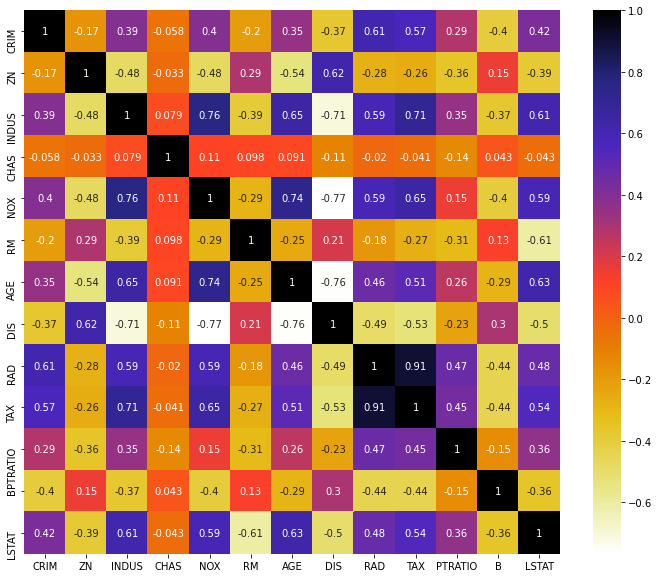

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


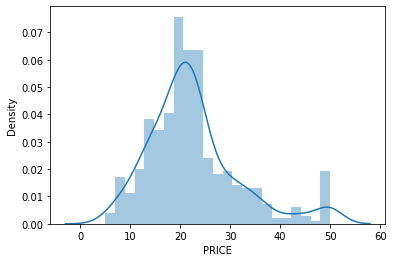

In [25]:
sns.distplot(df.PRICE)
plt.show()

Since RAD and TAX have high co-relation with each other, we are dropping one variable

In [26]:
X_train.drop('RAD', axis=1, inplace=True)
X_test.drop('RAD', axis=1, inplace=True)

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data (mean=0, sigma=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.362530,0.126595,-0.768242,-0.283221,-1.051356,-0.231056,-1.165853,2.014952,-0.443214,0.326601,0.354199,-0.496762
1,-0.394140,-0.431498,0.421497,-0.283221,-1.000060,0.414571,-0.599966,1.014207,-0.690158,-1.132154,0.384874,-0.749581
2,-0.145922,-0.431498,1.256971,-0.283221,0.436203,0.077850,0.985223,-0.829750,-0.003533,-1.743889,-0.715273,-0.219660
3,0.025248,-0.431498,1.038508,3.530817,1.846819,0.189114,0.805966,-0.636202,1.580522,0.844223,0.367526,0.090294
4,-0.386099,0.283008,-0.875998,-0.283221,-0.863273,0.726404,-0.867093,1.979318,-0.720273,0.608940,0.416237,-0.448197


In [30]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.514844,-0.366941,-0.631122,-0.227038,-0.988545,-1.250810,0.926640,1.049936,-1.099468,-0.327567,0.482046,2.369406
1,-0.551085,-0.481380,-1.404478,-0.227038,-1.276432,0.970363,-0.415147,2.620392,-1.195983,-0.022635,0.447332,-0.610573
2,0.164484,-0.366941,0.933768,-0.227038,0.509548,0.808823,-0.111558,-0.513119,1.358847,0.674352,0.271293,-0.137914
3,0.013987,-0.366941,0.933768,-0.227038,0.229784,-0.061408,-0.699996,0.170165,1.358847,0.674352,0.403512,-0.279319
4,-0.507990,-0.366941,-0.730414,-0.227038,-0.483164,1.728558,-2.008051,-0.118643,-0.679340,-0.545376,0.298135,-1.151316


In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [32]:
# Model Accuracy on TRAINING SET

from sklearn.metrics import r2_score

r2_train = model.score(X_train, y_train)
print("R2 in TRAINING SET : ", r2_train)

pred_train = model.predict(X_train)
adjr2_train = r2_score(y_train, pred_train)
print("Adjusted R2 in TRAINING SET : ", adjr2_train)

R2 in TRAINING SET :  0.9805192443266568
Adjusted R2 in TRAINING SET :  0.9805192443266568


In [35]:
r2_test = model.score(X_test, y_test)
print("R2 in TEST SET : ", r2_test)

pred_test = model.predict(X_test)
adj_r2_test = r2_score(y_test, pred_test)
print("Adj R2 in TEST SET : ", adj_r2_test)

R2 in TEST SET :  0.8608779270932526
Adj R2 in TEST SET :  0.8608779270932526


In [45]:
Param_grid = { 
            "n_estimators"      : [50,100,150,200],
            "max_features"      : [2,3,4,5,6],
            "min_samples_split" : [2,4,8],
            "max_depth"         : [5,10,15,20],
            }

In [46]:
from sklearn.model_selection import  GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestRegressor() , param_grid=Param_grid, cv=5, n_jobs =-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150, 200]})

In [47]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 6,
 'min_samples_split': 2,
 'n_estimators': 50}

In [60]:
model2 = RandomForestRegressor(max_features= 6, max_depth=15, min_samples_split=2, n_estimators=50, random_state=1)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=6, n_estimators=50,
                      random_state=1)

In [61]:
# Model Accuracy on TRAINING SET

r2_train = model2.score(X_train, y_train)
print("R2 in TRAINING SET : ", r2_train)

pred_train = model2.predict(X_train)
adjr2_train = r2_score(y_train, pred_train)
print("Adjusted R2 in TRAINING SET : ", adjr2_train)

R2 in TRAINING SET :  0.9790257248630864
Adjusted R2 in TRAINING SET :  0.9790257248630864


In [59]:
# Model Accuracy on TEST SET

r2_test = model2.score(X_test, y_test)
print("R2 in TEST SET : ", r2_test)

pred_test = model2.predict(X_test)
adj_r2_test = r2_score(y_test, pred_test)
print("Adj R2 in TEST SET : ", adj_r2_test)

R2 in TEST SET :  0.8613531462332199
Adj R2 in TEST SET :  0.8613531462332199


In [63]:
import pickle
pickle.dump(model2, open('model2.pickle', 'wb'))